## Statistics 504 - Fall 2015
### Class Project Proposal
### Erich Seamon
### erichs@uidaho.edu
### http://webpages.uidaho.edu/erichs
#       

### Title: " Exploring landslide potential across Washington using ensemble machine learning techniques"

### Introduction


The premise of this research will be to identify areas within the state of Washington that are susceptible to future landslides, based on the knowledge of past landslide events, terrain parameters, geological attributes, as well as daily meteorological data (precipitation, temperature, solar radiation, relative humidity , wind speed) (Abatzoglou, Brown, 2011).  

Previous work by Ardizzone et al (2002), Ayalew and Yamagishi (2005), Ohlmacher and DAvid (2003), all used logistical regression as a classifer method for landslide analysis. To expand upon this work, this project will explore 

-logistical regression, <br> 
-support vector analysis, <br>
-random forest, and <br>
-neural networks <br>

for model development, which will be used to predict landslide likelihood, based on historical and future climate scenario data sets.

Under the above approach, landslide explanatory variables will be fitted or “trained” on a training data set of an observed landslide locations, with thematic data such as morphometric attributes (slope, aspect) as well as information on (geology, landuse, ). In this context, the misclassification rate for landslide potential, as measured using the test data, will be the primary quantitative measure for evaluating the predictive power the model (Efron and Gong, 1983; Efron and Tib- shirani, 1986).

### Data Sources

2007 and 2008 Landslide data for the state of Washington, containing over 52,000 observations, was accessed from the Washington Department of Natural Recreation (WA DNR).  The data was provided as a downloadable .gdb file (geodatabase file).  


### Data Transformation before Analysis

The data was imported as a csv file - that was derived from the provided geodatabase file.  This csv file contained over 52,000 observations, with latitude and longitude included as well.  The csv file was transformed into a a pandas data frame, with text based categorical fields transformed to numeric values.  From this pandas data frame, our feature columns (X) and our response variable (y).

From the 52,000+ landslide observations:

-3695 had dates. This is essential to match up with specific climate values for that day, and for the days surrounding this date.

-Of these 3695 dates, 1886 had both dates and geological unit values. This subset of 1886 points are our final observation dataset.  


### Statistical Design

For this project, a machine learning process flow will be developed that fits the aforementioned algorithms (Random Forest, SVM, Logistical Regression, Neural Networks).  Then each model will be used for prediction and learning, as we iteratively identify optimal model tuning parameters.  

After refining the model - then a series of climate variables for a set of future scenarios will be run against the model, which should provide a landslide confidence level based on future climatic outcomes.

In [117]:
import PIL
import os,sys
from PIL import Image
basewidth = 500
img = Image.open("/git/stat504-python/STAT504-PROJECT/data/landslide_information_flow.jpg")
wpercent = (basewidth / float(img.size[0]))
hsize = int((float(img.size[1]) * float(wpercent)))
img = img.resize((basewidth, hsize), PIL.Image.ANTIALIAS)
img.save("/git/stat504-python/STAT504-PROJECT/data/landslide_information_flow_refined.jpg")

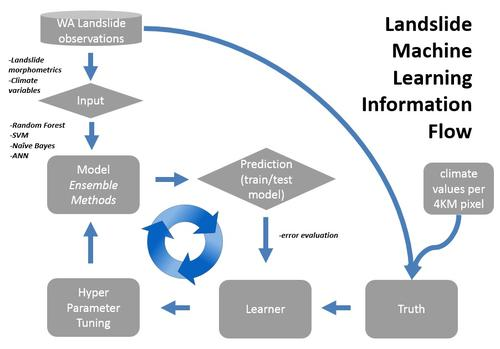

In [118]:
import os,sys
from PIL import Image
jpgfile = Image.open("/git/stat504-python/STAT504-PROJECT/data/landslide_information_flow_refined.jpg")
jpgfile



### Feature Variables:

These are the variables that were collected for each of the 3695 landslide observations:

1) Slope Shape (SLOPE_MORP)  CATEGORICAL - Planar, Convex, Concave, etc. <br>
2) Land Use (LAND_USE)  CATEGORICAL - Forestry, Road/Rail/Trail, Undistubed, Urban Development  <br>
3) Landslide Type (LANDSLIDE1)  CATEGORICAL - Debris Flows, Debris Slides and Avalanches, Shallow Undifferentiated, etc.<br>
4) Gradient (GRADIENT_D) CONTINUOUS - gradient of the landslide, in degrees.<br> 
5) Geologic Unit (GEOLOGIC_U) CATEGORICAL - geologic unit. <br>
6) min temp <br>
7) max temp <br>
8) mean precip (not daily) <br>
9) solar radiation <br>
10) specific humidity <br>


### Response Variable:

1) Landslide Confidence (LANDSLID_3) - Certain, Probable, Questionable, Unknown <br>



## Preliminary Data Import and Analysis

In [119]:
import matplotlib
%matplotlib nbagg

from pyproj import Proj
import StringIO
from pandas import DataFrame
import pandas as pd
import seaborn as sns
import pydot
from IPython.display import Image

from urllib2 import Request, urlopen
import json
from pandas.io.json import json_normalize
import numpy
from sklearn.cross_validation import cross_val_score

##### import csv file for all 52,000+WA landslides

In [120]:
import csv

#ifile  = open('/git/stat504-python/STAT504-PROJECT/data/WALandslides_export1.csv', "rb")
#reader = csv.reader(ifile)
#ifile.close()

In [121]:
walandslides_all = pd.read_csv('/git/stat504-python/STAT504-PROJECT/data/WALandslides_export4.csv')

In [122]:
walandslides = pd.read_csv('/git/stat504-python/STAT504-PROJECT/data/WALandslides_export5.csv')

##### Plot all 52,000+ WA landslides

<IPython.core.display.Javascript object>


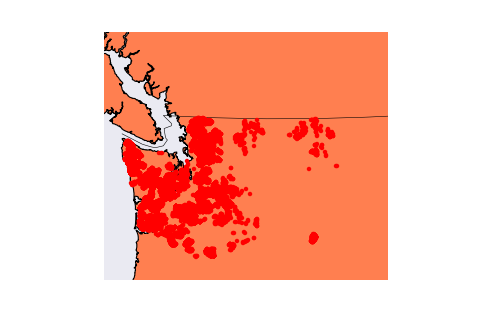

In [144]:

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

%matplotlib nbagg

#my_map = Basemap(projection='ortho',lon_0=-105,lat_0=40,resolution='l')

# make sure the value of resolution is a lowercase L,
#  for 'low', not a numeral 1
#my_map = Basemap(projection='ortho', lat_0=50, lon_0=-100,
#             resolution='l', area_thresh=500)

my_map2 = Basemap(llcrnrlon=-125, llcrnrlat=45, urcrnrlon=-115,
     urcrnrlat=51, projection='tmerc', lat_1=33, lat_2=45,
     lon_0=-119, lat_0=45, resolution='h', area_thresh=10000)

my_map2.drawcoastlines()
my_map2.drawcountries()
my_map2.fillcontinents(color='coral')

lon2 = np.array(walandslides_all.POINT_X)
lat2 = np.array(walandslides_all.POINT_Y)

lon = np.array(walandslides.POINT_X)
lat = np.array(walandslides.POINT_Y)

y2,x2 = my_map2(lon2, lat2)

y,x = my_map2(lon, lat)

my_map2.plot(y2,x2, 'ro', markersize=4, markeredgecolor = 'k')
#my_map2.plot(y,x, 'ro', markersize=4, markeredgecolor = 'k')

#my_map2.plot(y,x, 'ro', markersize=4) # plots oregon data
#cbar = plt.colorbar(sc, shrink = .5)

plt.show()

##### Refined landslides (N=1886) with known specific dates and geologic unit values, slope and gradient values

<IPython.core.display.Javascript object>


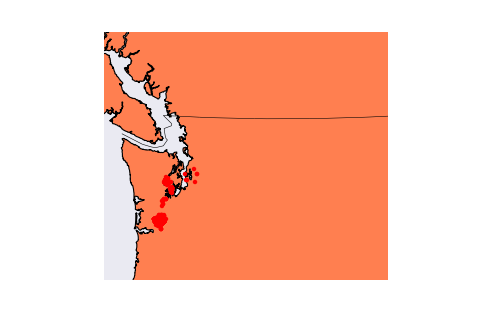

In [145]:
%matplotlib nbagg

my_map2 = Basemap(llcrnrlon=-125, llcrnrlat=45, urcrnrlon=-115,
     urcrnrlat=51, projection='tmerc', lat_1=33, lat_2=45,
     lon_0=-119, lat_0=45, resolution='h', area_thresh=10000)

my_map2.drawcoastlines()
my_map2.drawcountries()
my_map2.fillcontinents(color='coral')

my_map2.plot(y,x, 'ro', markersize=4, markeredgecolor = 'k')
plt.show()

In [125]:
#list(walandslides.LANDSLIDE1.values)

#### Convert categorical columns to numerical

In [126]:
walandslides['DATA_CONFI'] = walandslides.DATA_CONFI.map({'Low':0, 'Moderate-High':1})
walandslides['SLOPE_MORP'] = walandslides.SLOPE_MORP.map({'Planar':0, 'Concave-Planar':1, 'Concave, convergent':2, 'Planar-Concave':3, 'Planar-convex':4})
walandslides['LANDSLID_3'] = walandslides.LANDSLID_3.map({'Questionable':0, 'Probable':1, 'Certain':2, 'Unknown':3})

##### List WA landslides data frame

In [127]:
walandslides

,OBJECTID_1,OBJECTID,LANDSLIDE_,LANDSLIDE1,DSLS_MORPH,LANDSLID_1,GRADIENT_D,GRADIENT_M,SLOPE_MORP,ASPECT,...,DATA_CONFI,COMMENTS,FEATURE_SO,SOURCE_INF,SOURCE_DB_,URL,SHAPE_Leng,ORIG_FID,POINT_X,POINT_Y
0,1,1,50,Debris slide and avalanches,Unknown,NaN,38,Gradient degrees determined from Lidar,NaN,0,...,0,Probably flowed onto Hwy 101,"December 3rd 2007 storm reconnaissance, DGER, DNR","Sarikhan, I. Y.; Stanton, K. D.; Contreras, T....",0,http://www.dnr.wa.gov/publications/ger_ofr2008...,350.759924,0,-123.088915,47.476685
1,2,2,51,Shallow undifferentiated,Unknown,NaN,34,Gradient degrees determined from Lidar,0,0,...,0,NaN,"December 3rd 2007 storm reconnaissance, DGER, DNR","Sarikhan, I. Y.; Stanton, K. D.; Contreras, T....",0,http://www.dnr.wa.gov/publications/ger_ofr2008...,199.557245,1,-123.088312,47.477029
2,3,3,52,Debris slide and avalanches,Unknown,NaN,53,Gradient degrees determined from Lidar,4,0,...,0,Probably moved across Hwy 106,"December 3rd 2007 storm reconnaissance, DGER, DNR","Sarikhan, I. Y.; Stanton, K. D.; Contreras, T....",0,http://www.dnr.wa.gov/publications/ger_ofr2008...,634.614903,2,-123.053356,47.349413
3,4,4,53,Debris slide and avalanches,Unknown,NaN,51,Gradient degrees determined from Lidar,NaN,0,...,0,Probably moved across Hwy 106,"December 3rd 2007 storm reconnaissance, DGER, DNR","Sarikhan, I. Y.; Stanton, K. D.; Contreras, T....",0,http://www.dnr.wa.gov/publications/ger_ofr2008...,806.806661,3,-122.894125,47.401870
4,5,5,54,Shallow undifferentiated,Unknown,NaN,13,Gradient degrees determined from Lidar,0,0,...,0,"Damaged North Shore Rd, at least one lane","December 3rd 2007 storm reconnaissance, DGER, DNR","Sarikhan, I. Y.; Stanton, K. D.; Contreras, T....",0,http://www.dnr.wa.gov/publications/ger_ofr2008...,232.313240,4,-122.980466,47.394887
5,6,6,55,Debris slide and avalanches,Unknown,NaN,37,Gradient degrees determined from Lidar,0,0,...,0,Moved across two lanes of the North Shore Road...,"December 3rd 2007 storm reconnaissance, DGER, DNR","Sarikhan, I. Y.; Stanton, K. D.; Contreras, T....",0,http://www.dnr.wa.gov/publications/ger_ofr2008...,272.318033,5,-122.996276,47.386840
6,7,7,56,Shallow undifferentiated,Unknown,NaN,32,Gradient degrees determined from Lidar,0,0,...,0,"Damaged at least driveway, house?","December 3rd 2007 storm reconnaissance, DGER, DNR","Sarikhan, I. Y.; Stanton, K. D.; Contreras, T....",0,http://www.dnr.wa.gov/publications/ger_ofr2008...,167.461072,6,-123.016458,47.376396
7,8,8,57,Shallow undifferentiated,Unknown,NaN,31,Gradient degrees determined from Lidar,0,0,...,0,NaN,"December 3rd 2007 storm reconnaissance, DGER, DNR","Sarikhan, I. Y.; Stanton, K. D.; Contreras, T....",0,http://www.dnr.wa.gov/publications/ger_ofr2008...,171.645621,7,-123.015265,47.377505
8,9,9,58,Debris slide and avalanches,Unknown,NaN,40,Gradient degrees determined from Lidar,NaN,0,...,0,Damaged North Shore Rd,"December 3rd 2007 storm reconnaissance, DGER, DNR","Sarikhan, I. Y.; Stanton, K. D.; Contreras, T....",0,http://www.dnr.wa.gov/publications/ger_ofr2008...,222.684205,8,-123.019591,47.370388
9,10,10,59,Debris slide and avalanches,Unknown,NaN,38,Gradient degrees determined from Lidar,NaN,0,...,0,NaN,"December 3rd 2007 storm reconnaissance, DGER, DNR","Sarikhan, I. Y.; Stanton, K. D.; Contreras, T....",0,http://www.dnr.wa.gov/publications/ger_ofr2008...,345.299735,9,-122.951103,47.437622


### set geologic units as numeric

In [128]:
stringh = set(walandslides.GEOLOGIC_U)
l = list(stringh)
l2 = list(range(1, 106))

In [129]:
i = iter(l)
j = iter(l2)
k = list(zip(i, j))

#outRes = dict((l[i], l[i+1]) if i+1 < len(l) else (l[i], '') for i in xrange(len(l)))
kdict = dict(k)
kdict.values()

walandslides['GEOLOGIC_U'].replace(kdict, inplace=True)
#print walandslides.GEOLOGIC_U

## Set landslide type as numeric

In [130]:
stringh1 = set(walandslides.LANDSLIDE1)
J = list(stringh1)
J2 = list(range(1, 106))

In [131]:
i2 = iter(J)
j2 = iter(J2)
k2 = list(zip(i2, j2))

#outRes = dict((l[i], l[i+1]) if i+1 < len(l) else (l[i], '') for i in xrange(len(l)))
kdict2 = dict(k2)
kdict2.values()

walandslides['LANDSLIDE1'].replace(kdict2, inplace=True)
#print walandslides.LANDSLIDE1

In [132]:
walandslides = walandslides[np.isfinite(walandslides['SLOPE_MORP'])]
walandslides = walandslides[np.isfinite(walandslides['LANDSLIDE1'])]
walandslides = walandslides[np.isfinite(walandslides['DATA_CONFI'])]

#walandslides.loc[walandslides['GEOLOGIC_U'] == 'Evb(gr)'] = 65
#walandslides.loc[walandslides['LANDSLID_3'] == 'Unknown'] = 65
#walandslides = walandslides[walandslides.LANDSLIDE1.str.contains("nan") == False]

feature_cols = ['GEOLOGIC_U', 'SLOPE_MORP', 'LANDSLIDE1', 'GRADIENT_D', 'ASPECT', 'DATA_CONFI']
class_cols = ['DATA_CONFI']
#feature_cols = ['LANDSLIDE1']
X = walandslides[feature_cols]
y = walandslides.LANDSLID_3

In [133]:
y = pd.concat([y], axis=1)


In [134]:
#walandslides.DATA_CONFI.unique

In [135]:
print walandslides.LANDSLID_3.unique()

[2 1 0]


## Plot correlations between Landslide liklihood and other explanatory variables

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

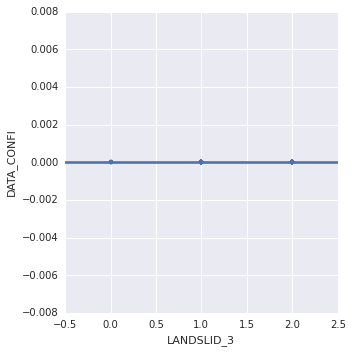

In [137]:
sns.lmplot(x='LANDSLID_3', y='DATA_CONFI', data=walandslides, ci=None)

### Landslide liklihood vs. landslide type (above)

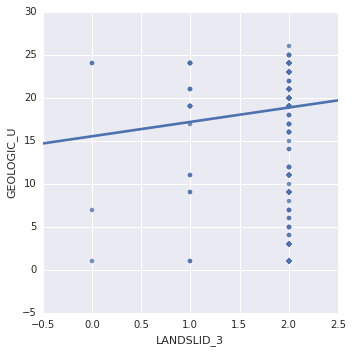

In [138]:
sns.lmplot(x='LANDSLID_3', y='GEOLOGIC_U', data=walandslides, ci=None)

### Landslide liklihood vs. geologic unit (above)

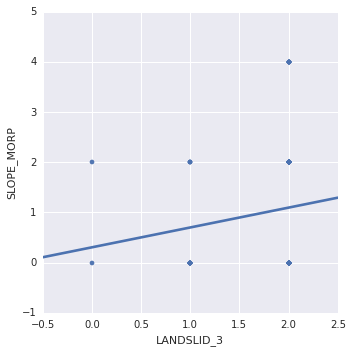

In [139]:
sns.lmplot(x='LANDSLID_3', y='SLOPE_MORP', data=walandslides, ci=None)

### Landslide liklihood vs. Slope Morphology (above)

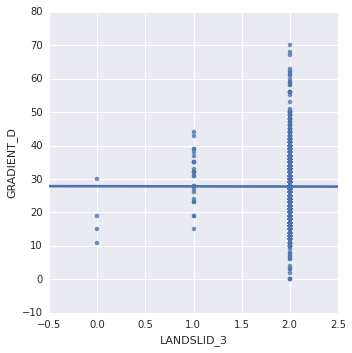

In [140]:
sns.lmplot(x='LANDSLID_3', y='GRADIENT_D', data=walandslides, ci=None)

### Landslide liklihood vs. Gradient (above)

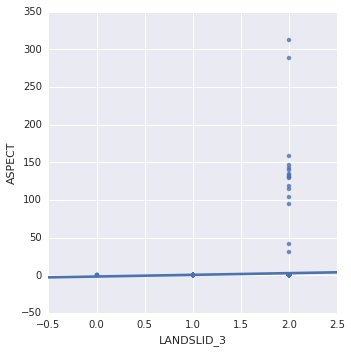

In [141]:
sns.lmplot(x='LANDSLID_3', y='ASPECT', data=walandslides, ci=None)

### Landslide liklihood vs. Aspect (above)

In [142]:
#new_X = X.dropna(subset=['DATA_CONFI'])
#X = pd.concat([X], axis=1)
#print y

## 10 fold cross-validation with K Nearest Neighbors

In [143]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print scores

IndexError: too many indices for array

In [ ]:
# search for an optimal value of K for KNN
k_range = range(1, 31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print k_scores

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

## 10-fold cross-validation with logistic regression


In [ ]:
# 10-fold cross-validation with logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
print cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean()

## 10 fold cross-validation for classification tree with max_depth=3

In [ ]:
# fit a classification tree with max_depth=3 on all data
from sklearn.tree import DecisionTreeClassifier
treeclf = DecisionTreeClassifier(max_depth=3, random_state=1)
scores = cross_val_score(treeclf, X, y, cv=10, scoring='accuracy')
treeclf.fit(X, y)
print scores

In [ ]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

In [ ]:
from StringIO import StringIO
tree_landslide = StringIO()

from sklearn.tree import DecisionTreeClassifier, export_graphviz
export_graphviz(treeclf, out_file=tree_landslide)

In [ ]:
graph = pydot.graph_from_dot_data(tree_landslide.getvalue())  
Image(graph.create_png())

In [ ]:
#y = np.ravel(y)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles


from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

model2 = ExtraTreesClassifier(random_state=42)
model = RandomForestClassifier(random_state=42)
model3 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), algorithm="SAMME", n_estimators=200)
#model.fit(X,y)
scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')
scores2 = cross_val_score(model2, X, y, cv=10, scoring='accuracy')
scores3 = cross_val_score(model3, X, y, cv=10, scoring='accuracy')
model.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)
print "R^2 model Random Forest Classifier:", model.score(X_test, y_test).round(2)
print "R^2 model Extra Trees Classifier:", model2.score(X_test, y_test).round(2)
print "R^2 model AdaBoost:", model3.score(X_test, y_test).round(2)

plot_colors = "br"





plot_colors = "br"
plot_step = 0.02
class_names = "AB"

plt.figure(figsize=(10, 5))

# Plot the decision boundaries
plt.subplot(121)
x_min, x_max = X(:, 0).min() - 1, X(:, 0).max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

Z = bdt.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis("tight")

# Plot the training points
for i, n, c in zip(range(2), class_names, plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1],
                c=c, cmap=plt.cm.Paired,
                label="Class %s" % n)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Decision Boundary')

# Plot the two-class decision scores
twoclass_output = bdt.decision_function(X)
plot_range = (twoclass_output.min(), twoclass_output.max())
plt.subplot(122)
for i, n, c in zip(range(2), class_names, plot_colors):
    plt.hist(twoclass_output[y == i],
             bins=10,
             range=plot_range,
             facecolor=c,
             label='Class %s' % n,
             alpha=.5)
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, y1, y2 * 1.2))
plt.legend(loc='upper right')
plt.ylabel('Samples')
plt.xlabel('Score')
plt.title('Decision Scores')

plt.tight_layout()
plt.subplots_adjust(wspace=0.35)
plt.show()




In [ ]:
pd.unique(X.GEOLOGIC_U.ravel())

In [ ]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

%matplotlib nbagg

my_map2 = Basemap(llcrnrlon=-125, llcrnrlat=45, urcrnrlon=-115,
     urcrnrlat=51, projection='tmerc', lat_1=33, lat_2=45,
     lon_0=-119, lat_0=45, resolution='h', area_thresh=10000)

my_map2.drawcoastlines()
my_map2.drawcountries()
#my_map2.fillcontinents(color='coral')

# Define a colormap
gist_ncar = plt.cm.get_cmap('gist_ncar')
# Transform points into Map's projection

lon2 = np.array(walandslides.POINT_X)
lat2 = np.array(walandslides.POINT_Y)
#c = np.random.random((1, 4))

lon = np.array(landslides_final3.Lon)
lat = np.array(landslides_final3.Lat)
cmap = plt.cm.RdYlBu_r


y2,x2 = my_map2(lon2, lat2)
y,x = my_map2(lon, lat)

# Color the transformed points!
my_map2.scatter(y2,x2, c=walandslides.GRADIENT_D, vmin=0, vmax =100, cmap=gist_ncar, s=20, edgecolors='none')
#sc = plt.scatter(y2,x2, c=walandslides.ASPECT, vmin=0, vmax =100, cmap=gist_ncar, s=20, edgecolors='none')
#sc = plt.scatter(y2,x2, c=walandslides.GEOLOGIC_U, vmin=0, vmax =100, cmap=gist_ncar, s=20, edgecolors='none')
#sc = plt.scatter(y2,x2, c=walandslides.LANDSLIDE1, vmin=0, vmax =100, cmap=gist_ncar, s=20, edgecolors='none')
#sc = plt.scatter(y2,x2, c=walandslides.DATA_CONFI, vmin=0, vmax =100, cmap=gist_ncar, s=20, edgecolors='none')

# And let's include that colorbar
cbar = plt.colorbar(sc, shrink = .5)
#cbar.set_label(temp)

#my_map2.plot(y2,x2, 'ro', c=c, markersize=4)
#my_map2.plot(y,x, 'ro', markersize=4) # plots oregon data

plt.show()

In [ ]:
y

In [ ]:
X.abs

In [ ]:
y_train

In [ ]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

%matplotlib nbagg

plt.scatter(X_train[:,0],X_train[:,1], marker='+')
#plt.scatter(y_train[:,0],y_train[:,1], c= 'green', marker='o')
plt.show()

In [ ]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

# import some data to play with
#iris = walandslides
#X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
#y = iris.target

h = .02  # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']


for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()